In [5]:
import numpy as np
import openpyxl
from openpyxl import load_workbook
from matplotlib import pyplot as plt
from matplotlib import rc


# Latex font rendering
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

In [6]:
wb = load_workbook("youths.xlsx")
ws = wb.active

In [21]:
## Task A10.1 a)
boys_only = {"age": [], "height": [], "weight": []}
girls_only = {"age": [], "height": [], "weight": []}
both = {"age": [], "height": [], "weight": []}

for row in ws.iter_rows(min_row=3, max_row=128, max_col=10, values_only=True):
    if row[0]:
        boys_only["age"].append(row[1])
        boys_only["height"].append(row[2])
        boys_only["weight"].append(row[3])
    if row[6]:
        girls_only["age"].append(row[7])
        girls_only["height"].append(row[8])
        girls_only["weight"].append(row[9])

both["age"] = boys_only["age"] + girls_only["age"]
both["height"] = boys_only["height"] + girls_only["height"]
both["weight"] = boys_only["weight"] + girls_only["weight"]

# Transform lists into numpy arrays
for dic in [boys_only, girls_only, both]:
    for k in dic:
        dic[k] = np.array(dic[k])

boys_cov = np.corrcoef( np.stack((boys_only["age"], boys_only["height"], boys_only["weight"])) )
girls_cov = np.corrcoef( np.stack((girls_only["age"], girls_only["height"], girls_only["weight"])) )
both_cov = np.corrcoef( np.stack((both["age"], both["height"], both["weight"])) )

print(boys_cov)
print(girls_cov)
print(both_cov)


[[1.         0.77244224 0.68251367]
 [0.77244224 1.         0.79880831]
 [0.68251367 0.79880831 1.        ]]
[[1.         0.5438528  0.53926554]
 [0.5438528  1.         0.75110792]
 [0.53926554 0.75110792 1.        ]]
[[1.         0.65196733 0.60816943]
 [0.65196733 1.         0.77672884]
 [0.60816943 0.77672884 1.        ]]


In [37]:
## Task A10.1 a)
boys_indices = ( np.where(boys_only["age"] < 156)[0],
np.where( (boys_only["age"] >= 156) & (boys_only["age"] <= 180) )[0],
np.where(boys_only["age"] > 180)[0] )

girls_indices = ( np.where(girls_only["age"] < 156)[0],
np.where( (girls_only["age"] >= 156) & (girls_only["age"] <= 180) )[0],
np.where(girls_only["age"] > 180)[0] )

both_indices = ( np.where(both["age"] < 156)[0],
np.where( (both["age"] >= 156) & (both["age"] <= 180) )[0],
np.where(both["age"] > 180)[0] )

In [48]:
for data, inds in zip([boys_only, girls_only, both], [boys_indices, girls_indices, both_indices]) :
    for ind in inds:
        print(np.corrcoef(np.stack((data["age"][ind], data["height"][ind], data["weight"][ind])) ))
        print()

[[1.         0.38283732 0.30658604]
 [0.38283732 1.         0.67048779]
 [0.30658604 0.67048779 1.        ]]

[[1.         0.29358451 0.15205331]
 [0.29358451 1.         0.63152096]
 [0.15205331 0.63152096 1.        ]]

[[1.         0.38121368 0.50004767]
 [0.38121368 1.         0.66894865]
 [0.50004767 0.66894865 1.        ]]

[[1.         0.4961568  0.55583464]
 [0.4961568  1.         0.80188155]
 [0.55583464 0.80188155 1.        ]]

[[1.         0.35513237 0.37340051]
 [0.35513237 1.         0.57714873]
 [0.37340051 0.57714873 1.        ]]

[[1.         0.09022918 0.45236524]
 [0.09022918 1.         0.64251774]
 [0.45236524 0.64251774 1.        ]]

[[1.         0.43923493 0.44279066]
 [0.43923493 1.         0.74554017]
 [0.44279066 0.74554017 1.        ]]

[[1.         0.24101465 0.22708609]
 [0.24101465 1.         0.59479869]
 [0.22708609 0.59479869 1.        ]]

[[1.         0.2457473  0.48254362]
 [0.2457473  1.         0.70356627]
 [0.48254362 0.70356627 1.        ]]



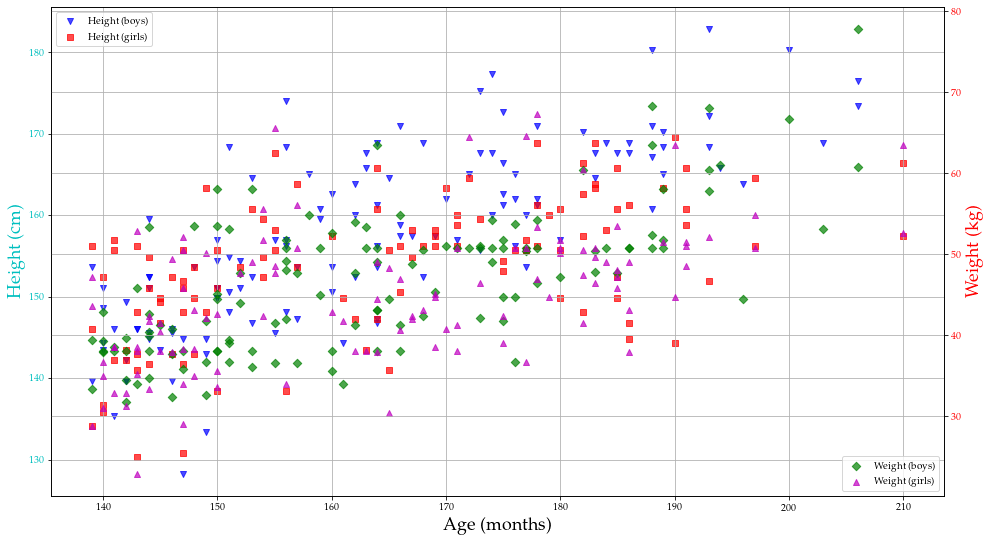

<ipython-input-81-f57dc005aaac>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


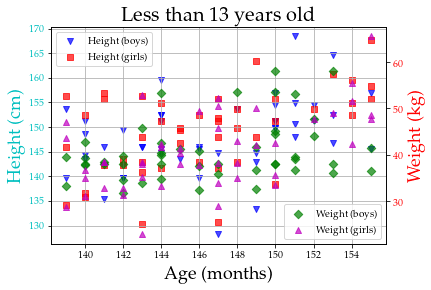

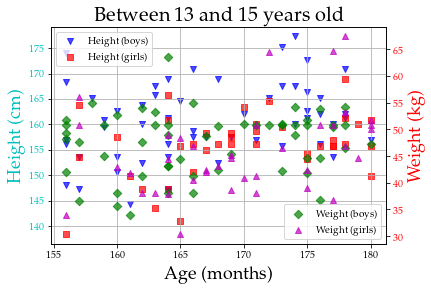

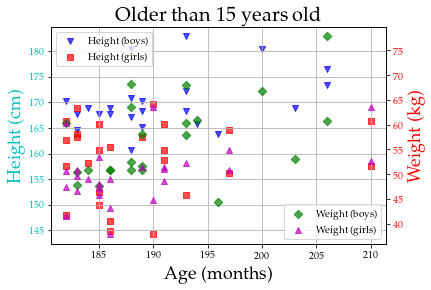

In [81]:


fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)
ax1.scatter(boys_only["age"], boys_only["height"], c="b", marker="v", alpha=0.7, label="Height (boys)")
ax1.scatter(girls_only["age"], girls_only["height"], c="r", marker="s", alpha=0.7, label="Height (girls)")
ax1.grid()
ax1.set_xlabel('Age (months)', fontsize=18)
ax1.set_ylabel('Height (cm)', color='c', fontsize=18)
for tl in ax1.get_yticklabels():
    tl.set_color('c')

ax2 = ax1.twinx()
ax2.scatter(boys_only["age"], boys_only["weight"], c="g", marker="D", alpha=0.7, label="Weight (boys)")
ax2.scatter(girls_only["age"], girls_only["weight"], c="m", marker="^", alpha=0.7, label="Weight (girls)")
ax2.set_ylabel('Weight (kg)', color='r', fontsize=18)
ax2.grid()
for tl in ax2.get_yticklabels():
    tl.set_color('r')

ax1.legend(loc='upper left', fancybox=True)
ax2.legend(loc='lower right', fancybox=True)
plt.show()

titles = ["Less than 13 years old", "Between 13 and 15 years old", "Older than 15 years old"]
for k in range(3):
    fig = plt.figure()
    plt.title(titles[k], fontsize=20)
    ax1 = fig.add_subplot(111)
    ax1.scatter(boys_only["age"][boys_indices[k]], boys_only["height"][boys_indices[k]], c="b", marker="v", alpha=0.7, label="Height (boys)")
    ax1.scatter(girls_only["age"][girls_indices[k]], girls_only["height"][girls_indices[k]], c="r", marker="s", alpha=0.7, label="Height (girls)")
    ax1.grid()
    ax1.set_xlabel('Age (months)', fontsize=18)
    ax1.set_ylabel('Height (cm)', color='c', fontsize=18)
    for tl in ax1.get_yticklabels():
        tl.set_color('c')

    ax2 = ax1.twinx()
    ax2.scatter(boys_only["age"][boys_indices[k]], boys_only["weight"][boys_indices[k]], c="g", marker="D", alpha=0.7, label="Weight (boys)")
    ax2.scatter(girls_only["age"][girls_indices[k]], girls_only["weight"][girls_indices[k]], c="m", marker="^", alpha=0.7, label="Weight (girls)")
    ax2.set_ylabel('Weight (kg)', color='r', fontsize=18)
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    ax1.legend(loc='upper left', fancybox=True)
    ax2.legend(loc='lower right', fancybox=True)
    plt.show()


